In [6]:
#import re, string

#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer


# SKLean
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.manifold import MDS
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
#from sklearn.model_selection import cross_val_score, StratifiedKFold
#from sklearn.tree import DecisionTreeClassifier
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split, KFold



#LdaMulticore, TfidfModel
#from gensim import corpora
import gensim
from gensim.models import Word2Vec,LdaMulticore, TfidfModel



from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.tri as tri
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import multiprocessing

import importlib
import NLPPrep
from NLPPrep import tokenization, One_Hot, newsloader
import tensorflow as tf

In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Get Data

In [8]:
news = newsloader(directory='headlines')

Total files: 1
Total records: 47078


Combine the headline, keywords, and snippet into a single cell

In [9]:
news[['date','headline', 'snippet', 'keywords']][:5]

,date,headline,snippet,keywords
0,2020-01-01,‘Battling a Demon’: Drifter Sought Help Before...,The gunman who shot two parishioners at the We...,"['Churches (Buildings)', 'Murders, Attempted M..."
1,2020-01-01,F.D.A. Plans to Ban Most E-Cigarette Flavors b...,The tobacco and vaping industries and conserva...,"['E-Cigarettes', 'Recalls and Bans of Products..."
2,2020-01-01,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...","['Demonstrations, Protests and Riots', 'Hong K..."
3,2020-01-01,Kevin Spacey Accuser’s Estate Drops Sexual Ass...,"A Los Angeles County massage therapist, who di...","['Sexual Harassment', 'Suits and Litigation (C..."
4,2020-01-01,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,"['United States International Relations', 'Uni..."


In [10]:
def Num_na(df):
    print (f"Total NA in headline: {sum(df['headline'].isna())}")
    print (f"Total NA in Snippet: {sum(df['snippet'].isna())}")
    print (f"Total NA in Keywords: {sum(df['keywords'].isna())}")

def prep_news(news):
    db = news.copy()
    print (f'Processing {len(db)} articles...')
    Num_na(db)
    print (f'removing empty fields.')
    db["headline"] = db["headline"].fillna(" ")
    db["snippet"] = db["snippet"].fillna(" ")
    Num_na(db)
    return (db)
    

In [11]:
data = prep_news(news)

Processing 47078 articles...
Total NA in headline: 1
Total NA in Snippet: 3381
Total NA in Keywords: 0
removing empty fields.
Total NA in headline: 0
Total NA in Snippet: 0
Total NA in Keywords: 0


In [13]:
data

,headline,date,doc_type,type_of_material,snippet,source,news_desk,section_name,keywords
0,‘Battling a Demon’: Drifter Sought Help Before...,2020-01-01,article,News,The gunman who shot two parishioners at the We...,The New York Times,National,U.S.,"['Churches (Buildings)', 'Murders, Attempted M..."
1,F.D.A. Plans to Ban Most E-Cigarette Flavors b...,2020-01-01,article,News,The tobacco and vaping industries and conserva...,The New York Times,Science,Health,"['E-Cigarettes', 'Recalls and Bans of Products..."
2,Hong Kong Protesters Return to Streets as New ...,2020-01-01,article,News,"Weeks of relative calm ended on Wednesday, as ...",The New York Times,Foreign,World,"['Demonstrations, Protests and Riots', 'Hong K..."
3,Kevin Spacey Accuser’s Estate Drops Sexual Ass...,2020-01-01,article,News,"A Los Angeles County massage therapist, who di...",The New York Times,Express,U.S.,"['Sexual Harassment', 'Suits and Litigation (C..."
4,Dizzying Day for Trump Caps a Year Full of Them,2020-01-01,article,News,The president monitored a Middle East crisis f...,The New York Times,Washington,U.S.,"['United States International Relations', 'Uni..."
...,...,...,...,...,...,...,...,...,...
47073,"Inside a Deadly Bronx Fire: Scenes of Chaos, D...",2022-01-16,article,News,When the building where they made their home b...,The New York Times,Metro,New York,"['Fires and Firefighters', 'Deaths (Fatalities..."
47074,"Andrew Vachss, Children’s Champion in Court an...",2022-01-16,article,News,In hard-edged fiction and in the real-life cou...,The New York Times,Obits,Obituaries,"['Child Abuse and Neglect', 'Sex Crimes', 'Dea..."
47075,Tonga Shrouded by Ash and Mystery After Powerf...,2022-01-16,article,News,"So far, the only deaths reported occurred 6,00...",The New York Times,Foreign,World,"['Volcanoes', 'Tidal Waves and Tsunamis', 'Dea..."
47076,"In reporting a drop in daily cases, Hochul see...",2022-01-16,article,News,,The New York Times,Metro,New York,[]


In [12]:
for i in data:
    text = clean_doc(i)
    processed_text.append(text)
print (len(processed_text))

NameError: name 'clean_doc' is not defined

In [23]:
def concat_news()

SyntaxError: invalid syntax (1190623131.py, line 1)

In [24]:
news['articles'] = news['headline']+" "+news['snippet'] + " " + news['keywords']
#pd.DataFrame(news['articles'][3])

In [25]:
news['articles'][3]

"UMass Amherst Hires Cybersecurity Firm to Investigate Racist Emails The university’s vice chancellor told students the emails, which targeted Black students, were part of a rise in “anti-Black racist incidents” on campus this academic year. ['Colleges and Universities', 'Discrimination', 'Black People', 'Blacks', 'E-Mail']"

In [26]:
titles = []
articles = []

In [27]:
titles = news['headline']
len(titles)

47078

In [28]:
articles = news['articles'].tolist()
print (len(articles))
articles[0]

47078


"When the Doctor’s Notes Hurt Your Feelings Are you a “poor historian,” “well nourished” or in need of a “time out”? As patients gain access to their own medical records, the notes left by doctors can sting. ['Electronic Health Records', 'Doctors', 'internal-sub-only']"

In [29]:
processed_text = []

In [30]:
articles[4]

"‘Everything Going the Wrong Way’: Dollar Stores Hit a Pandemic Downturn Their business model is being tested by worker burnout, pressure to raise wages, supply chain problems and growing local opposition. ['Shopping and Retail', 'Wages and Salaries', 'Labor and Jobs', 'Part-Time Employment', 'Working Hours', 'Workplace Hazards and Violations', 'International Trade and World Market']"

In [31]:
for i in articles:
    text = clean_doc(i)
    processed_text.append(text)
print (len(processed_text))

NameError: name 'clean_doc' is not defined

In [32]:
final_processed_text = []

In [33]:
len(final_processed_text)

0

In [34]:
len(news)

47078

In [35]:
for i in processed_text:
    if bool(i) == False:
        i = "error"

    temp_DSI = i[0]
    for j in range(1, len(i)):
        temp_DSI = temp_DSI+' '+i[j]
    final_processed_text.append(temp_DSI)
len(final_processed_text)

0

In [36]:
final_processed_text[:5]

[]

## TFIDF Values

In [37]:
Tfidf=TfidfVectorizer(
    sublinear_tf = True,
    min_df = 5,
    ngram_range=(1,2), 
    stop_words = 'english',
    strip_accents= 'unicode', 
    dtype=np.float32
)

In [38]:
TFIDF_matrix = Tfidf.fit_transform(final_processed_text)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [39]:
matrix = pd.DataFrame(TFIDF_matrix.toarray(), 
                      columns = Tfidf.get_feature_names_out(),
                      index = titles
                     )

NameError: name 'TFIDF_matrix' is not defined

In [40]:
average_TFIDF = {}

In [41]:
for i in matrix.columns:
    average_TFIDF[i] = np.mean(matrix[i])

NameError: name 'matrix' is not defined

In [42]:
average_TFIDF_DF=pd.DataFrame(average_TFIDF,index=[0]).transpose()

In [43]:
average_TFIDF_DF.columns=['TFIDF']

In [44]:
Q1=np.percentile(average_TFIDF_DF, 25)
Q3=np.percentile(average_TFIDF_DF, 75)
IQR = Q3 - Q1
outlier=Q3+(1.5*IQR)

IndexError: cannot do a non-empty take from an empty axes.

In [ ]:
average_TFIDF_DF.sort_values(by="TFIDF", ascending=False).to_csv("TFIDF.csv")

In [45]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]

In [46]:
cores = multiprocessing.cpu_count()
print (f'Total Cores: {cores}')
model = Doc2Vec(documents, 
                vector_size = 100, 
                window = 2, 
                min_count = 2, 
                workers = cores)

Total Cores: 8


RuntimeError: you must first build vocabulary before training the model

In [47]:
doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

In [327]:
model_w2v = Word2Vec(processed_text, 
                     vector_size = 100, 
                     window = 5, 
                     min_count = 1, 
                     workers = cores)

In [334]:

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()


#the following section runs applies the k-means algorithm on the TFIDF matrix.

## Kmeans

In [432]:
k = 13
model1 = KMeans(n_clusters=k, random_state =89)
model1.fit(TFIDF_matrix)
clusters = model1.labels_.tolist()


terms = Tfidf.get_feature_names_out()
Dictionary = {'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
frame = pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

## What are the centers?

In [433]:
centroids = model1.cluster_centers_
centroids

array([[0.00038879, 0.00056071, 0.00032311, ..., 0.0028577 , 0.00041337,
        0.        ],
       [0.        , 0.        , 0.00157114, ..., 0.        , 0.0013912 ,
        0.        ],
       [0.        , 0.        , 0.00387366, ..., 0.        , 0.00183644,
        0.        ],
       ...,
       [0.        , 0.02129951, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01249953, 0.        , 0.00516348, ..., 0.        , 0.        ,
        0.0037324 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [434]:
model2 = KMeans(n_clusters = k,
                init = centroids,
               n_init = 1)
model2.fit(TFIDF_matrix)
centroids_2 = model2.cluster_centers_
centroids_2

array([[0.00038879, 0.00056071, 0.00032311, ..., 0.0028577 , 0.00041337,
        0.        ],
       [0.        , 0.        , 0.00157114, ..., 0.        , 0.0013912 ,
        0.        ],
       [0.        , 0.        , 0.00387366, ..., 0.        , 0.00183644,
        0.        ],
       ...,
       [0.        , 0.02129951, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01249953, 0.        , 0.00516348, ..., 0.        , 0.        ,
        0.0037324 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

## Plot

In [11]:
pca_num_components = 2
tsne_num_components = 2

In [12]:
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}

In [13]:
labels = range(k)

NameError: name 'k' is not defined

In [14]:
len(labels)

NameError: name 'labels' is not defined

In [439]:
#labels = model2.labels_
#X = TFIDF_matrix.todense()

### Centroids

In [440]:
pca_result = PCA(n_components=3).fit_transform(centroids)
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

In [441]:
df['pca-one']

0     0.021307
1    -0.078478
2    -0.160289
3    -0.333533
4     0.019370
5     0.336420
6     0.230272
7     0.019160
8    -0.076613
9     0.013888
10   -0.030885
11    0.002698
12    0.036683
Name: pca-one, dtype: float32

## Visualize Centroids

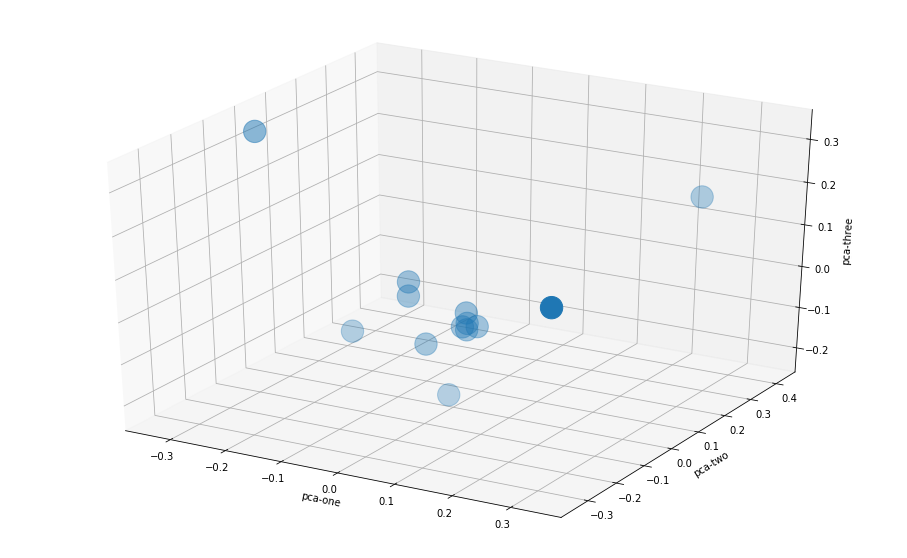

In [442]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
labels = range(0,k)
#color = list(labels_color_map)[:k]
x = df["pca-one"]
y = df["pca-two"]
z = df["pca-three"]

ax.scatter(
    xs = x, 
    ys = y,
    zs = z,
    #c = color,
    s = 500
    #cmap='tab10',
    #hue = labels_color_map
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
#triang = tri.Triangulation(x, y)
#ax.triplot(tri.Triangulation(), 'bo-', lw=1)

plt.show()


In [443]:
pca_result = PCA(n_components=2).fit_transform(centroids)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]

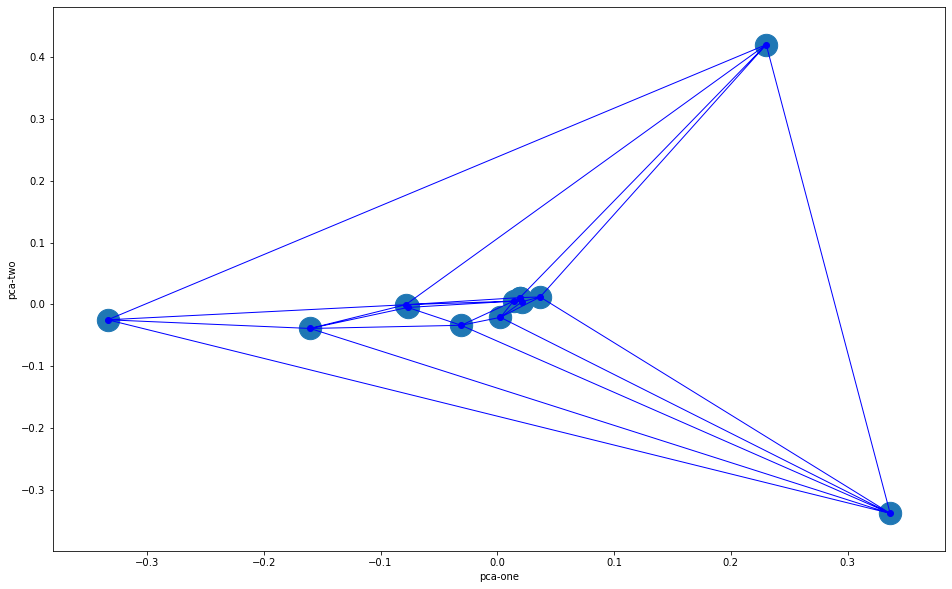

In [444]:
ax = plt.figure(figsize=(16,10)).gca()
labels = range(0,k)
color = list(labels_color_map)[:k]
x = df["pca-one"]
y = df["pca-two"]

ax.scatter(
    x = x, 
    y = y,
    #c = color,
    s = 500
    #cmap='tab10',
    #hue = labels_color_map
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.triplot(tri.Triangulation(x, y), 'bo-', lw=1)

plt.show()


KeyError: 10

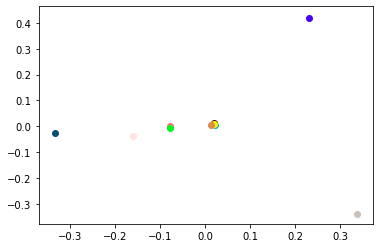

In [445]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(centroids)
labels = range(0,k)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    #sns.scatterplot(pca_comp_1, pca_comp_2)
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

## TSNE PLOT

/home/andrew/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/andrew/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/andrew/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/andrew/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


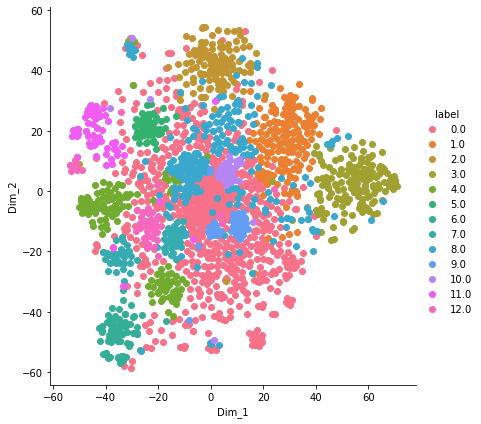

In [447]:
# t-SNE plot
TSNY_model = TSNE(n_components=tsne_num_components)
Y = TSNY_model.fit_transform(X)
results = np.vstack((Y.T,labels)).T
df = pd.DataFrame(results, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(df, hue="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [ ]:
km.get_params(deep=True)

In [ ]:
k

In [294]:
print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = model1.cluster_centers_.argsort()[:, ::-1] 
terms_dict=[]

#save the terms for each cluster and document to dictionaries.  To be used later
#for plotting output.

#dictionary to store terms and titles
cluster_terms={}
cluster_title={}

print_titles = False
for i in range(k):
    print("Cluster %d:" % i),
    temp_terms=[]
    temp_titles=[]
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
    cluster_terms[i]=temp_terms
    temp=frame[frame['Cluster']==i]
    if print_titles:
        print("Cluster %d titles:" % i, end='')
        
    for title in temp['Doc Name']:
        if print_titles:
            print(' %s,' % title, end='')
        temp_titles.append(title)
        cluster_title[i]=temp_titles

Top terms per cluster:
Cluster 0:
 government
 politics
 politics government
 states
 united
 united states
 murders
 travel
 people
 crimes
Cluster 1:
 coronavirus
 epidemics
 china
 outbreak
 coronavirus epidemics
 cases
 virus
 health
 quarantines
 travel
Cluster 2:
 impeachment
 impeachment inquiry
 inquiry
 whistleblower
 trumpukraine
 trumpukraine whistleblower
 complaint impeachment
 whistleblower complaint
 complaint
 trial
Cluster 3:
 trade
 global
 world
 market
 world market
 trade world
 international trade
 warming
 global warming
 international
Cluster 4:
 estate
 housing
 residential
 housing residential
 estate housing
 homes
 house
 renting
 renting leasing
 leasing
Cluster 5:
 presidential
 election
 presidential election
 caucuses
 primaries
 primaries caucuses
 sanders
 election primaries
 political
 democratic
Cluster 6:
 military
 forces
 defense
 defense military
 military forces
 states defense
 united states
 united
 states
 international


In [295]:
cluster_terms

{0: ['government',
  'politics',
  'politics government',
  'states',
  'united',
  'united states',
  'murders',
  'travel',
  'people',
  'crimes'],
 1: ['coronavirus',
  'epidemics',
  'china',
  'outbreak',
  'coronavirus epidemics',
  'cases',
  'virus',
  'health',
  'quarantines',
  'travel'],
 2: ['impeachment',
  'impeachment inquiry',
  'inquiry',
  'whistleblower',
  'trumpukraine',
  'trumpukraine whistleblower',
  'complaint impeachment',
  'whistleblower complaint',
  'complaint',
  'trial'],
 3: ['trade',
  'global',
  'world',
  'market',
  'world market',
  'trade world',
  'international trade',
  'warming',
  'global warming',
  'international'],
 4: ['estate',
  'housing',
  'residential',
  'housing residential',
  'estate housing',
  'homes',
  'house',
  'renting',
  'renting leasing',
  'leasing'],
 5: ['presidential',
  'election',
  'presidential election',
  'caucuses',
  'primaries',
  'primaries caucuses',
  'sanders',
  'election primaries',
  'political',

In [ ]:
pd.DataFrame(cluster_title[7]).to_csv("cluster7.csv")